## Ayudantía 3
### Reguladores y Validación Cruzada

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from prettytable import PrettyTable

In [17]:
df = pd.read_csv('energy.csv')


In [19]:
df.drop(columns=['user_id', 'customer_since'], inplace=True)
df.dropna(inplace=True)
df

,average_daily_consumption,average_days_to_bill_payment,area,age,marital_status,educational_level,prefecture,average_monthly_visits,average_web_monthly_visits,average_mobile_monthly_visits
0,7.797533,-33.932899,136.200805,40-55,Married,Master’s degree,Neon-Attika,0.865182,0.538854,0.330131
1,25.068224,-3.213220,97.656313,30-39,Married,Bachelor’s degree,Corinthus Crossroads,4.154858,0.697384,3.491964
2,7.875073,16.366928,133.072322,40-55,Married,Master’s degree,Neon-Attika,2.819235,2.394294,0.560970
3,12.309787,-2.479825,88.884085,40-55,Married,Master’s degree,Neon-Attika,0.852767,0.569274,0.238127
4,8.888037,14.005530,64.459468,30-39,Married,Bachelor’s degree,Evoa Conglomerate,11.056524,3.527665,7.131606
...,...,...,...,...,...,...,...,...,...,...
1248,36.049991,7.913366,101.345573,30-39,Married,Master’s degree,Chanion Underhive,33.277992,2.605684,30.750945
1249,12.912167,0.000000,87.722475,40-55,Married,"High school graduate, diploma or the equivalent",Evrax,7.630204,2.578579,4.768062
1250,42.633626,12.018915,81.664547,40-55,Married,Bachelor’s degree,Rethyx-Pterax,13.177438,1.446155,11.965140
1251,49.460804,5.011639,120.466909,30-39,Married,"High school graduate, diploma or the equivalent",Kavallon,39.063468,4.521204,36.102688


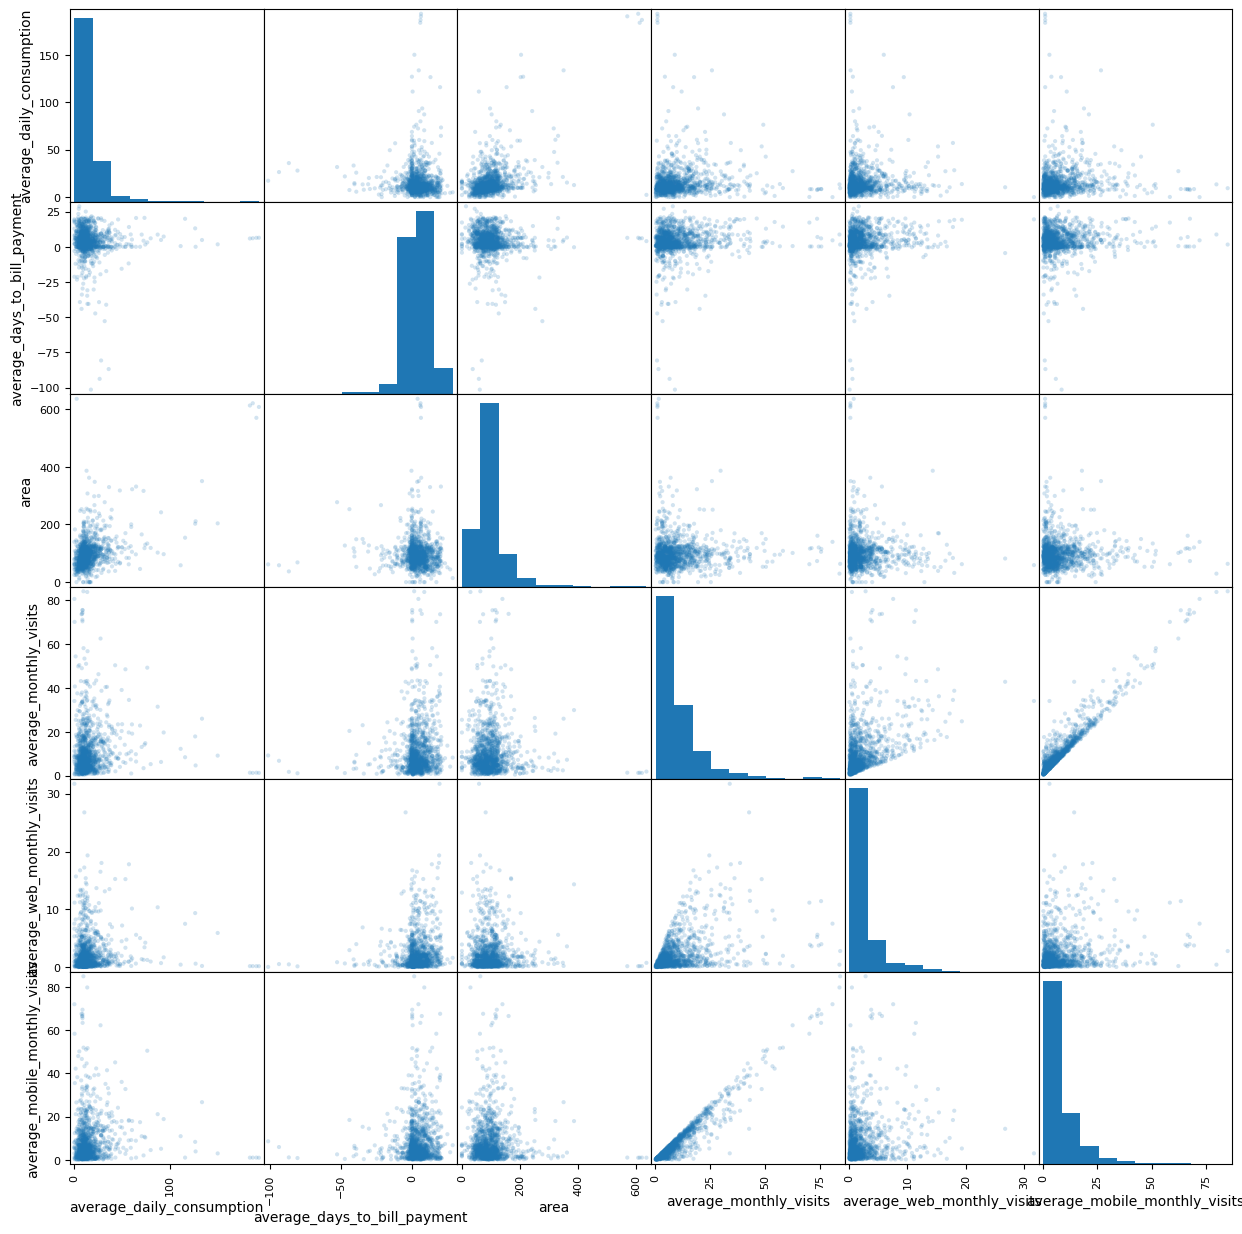

In [96]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df, alpha=0.2, figsize=(15, 15)) # SPLOM
plt.show()

### Variable objetivo: average_daily_consumption	

In [21]:
X = df.drop(columns=['average_daily_consumption'])
y = df["average_daily_consumption"]

encoder = LabelEncoder()

X["age"] = encoder.fit_transform(X["age"])
X["marital_status"] = encoder.fit_transform(X["marital_status"]) 
X["educational_level"] = encoder.fit_transform(X["educational_level"])
X["prefecture"] = encoder.fit_transform(X["prefecture"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=254)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [26]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MSE: 201.76798533311995
R^2: 0.1177805187911749


In [ ]:
L1 = Lasso(alpha=1)
L1.fit(X_train, y_train)
y_pred = L1.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MSE: 203.44209664783293
R^2: 0.110460558624484


In [ ]:
l1_optimizer = GridSearchCV(L1, {'alpha': [0.1, 5, 10, 15, 50, 60, 100, 120, 200 ]}, cv=5, scoring='r2') # modelo 
l1_optimizer.fit(X_train, y_train) # dobleces de la validación cruzada
l1_optimizer.best_params_
# Con randomized SearchCV deberían ocupar un valor inicial, valor final y los steps

c:\Users\matia\anaconda3\envs\entrega2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.784e+02, tolerance: 1.671e+01
  model = cd_fast.enet_coordinate_descent(


{'alpha': 200}

In [89]:
L1_opt = Lasso(alpha=l1_optimizer.best_params_['alpha'])
L1_opt.fit(X_train, y_train)
y_pred = L1_opt.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MSE: 199.86236613401718
R^2: 0.1261127345212294


In [85]:
L1_opt.coef_

array([-0.        ,  0.10880437,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ])

In [92]:
ec = ''
for coeficiente, predictor in zip(L1_opt.coef_, X.columns):
    ec += f' {abs(coeficiente):.3f}*{predictor} +'
modelo_ajustado_L1 = f"y_hat = {L1_opt.intercept_:.3f} +{ec}"
modelo_ajustado_L1

'y_hat = 4.836 + 0.000*average_days_to_bill_payment + 0.109*area + 0.000*age + 0.000*marital_status + 0.000*educational_level + 0.000*prefecture + 0.000*average_monthly_visits + 0.000*average_web_monthly_visits + 0.000*average_mobile_monthly_visits +'

In [105]:
L2 = Ridge(alpha=l2_optimizer.best_params_["alpha"])
L2.fit(X_train, y_train)
y_pred = L2.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MSE: 202.19190966387427
R^2: 0.11592693283930844


In [104]:
l2_optimizer = GridSearchCV(L2, {'alpha': [0.1, 5, 10, 15, 50, 60, 100, 120, 200 ]}, cv=5, scoring='r2') # modelo 
l2_optimizer.fit(X_train, y_train) # dobleces de la validación cruzada
l2_optimizer.best_params_
# Con randomized SearchCV deberían ocupar un valor inicial, valor final y los steps

{'alpha': 100}

In [106]:
ec = ''
for coeficiente, predictor in zip(L2.coef_, X.columns):
    ec += f' {abs(coeficiente):.3f}*{predictor} +'
modelo_ajustado_L2 = f"y_hat = {L2.intercept_:.3f} +{ec}"
modelo_ajustado_L2

'y_hat = -5.292 + 0.009*average_days_to_bill_payment + 0.161*area + 1.137*age + 0.914*marital_status + 0.930*educational_level + 0.030*prefecture + 0.286*average_monthly_visits + 0.518*average_web_monthly_visits + 0.353*average_mobile_monthly_visits +'

### Lasso L1 -> Reducir coeficientes de predictores a cero si no están correlacionados linealmente con la variable objetivo.
### Ridge L2 -> Reducir coeficientes de predictores a casi cero si están correlacioneados linealmente entre sí.
### ElasticNet -> L1 + L2

In [107]:
import statsmodels.api as sm
from statsmodels.api import OLS 

X_train_int = sm.add_constant(X_train)

modelo = OLS(y_train, X_train_int).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     average_daily_consumption   R-squared:                       0.329
Model:                                   OLS   Adj. R-squared:                  0.322
Method:                        Least Squares   F-statistic:                     47.16
Date:                       Sat, 13 Sep 2025   Prob (F-statistic):           2.98e-69
Time:                               17:44:42   Log-Likelihood:                -3586.6
No. Observations:                        877   AIC:                             7193.
Df Residuals:                            867   BIC:                             7241.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -5.3613      2.867     -1.870      0.062     -10.988       0.266
average_days_to_bill_payment     -0.0056      0.055     -0.101      0.920      -0.114       0.103
area                              0.1600      0.008     19.311      0.000       0.144       0.176
age                               1.2817      0.606      2.114      0.035       0.092       2.471
marital_status                   -1.2566      0.986     -1.275      0.203      -3.191       0.678
educational_level                 0.9993      0.398      2.514      0.012       0.219       1.780
prefecture                        0.0324      0.051      0.640      0.522      -0.067       0.132
average_monthly_visits           -0.6445      0.811     -0.794      0.427      -2.237       0.948
average_web_monthly_visits        0.8802      0.829      1.061      0.289      -0.748       2.508
average_mobile_monthly_visits     0.7151      0.820      0.872      0.383      -0.894       2.324
==============================================================================
Omnibus:                      583.888   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14588.340
Skew:                           2.626   Prob(JB):                         0.00
Kurtosis:                      22.278   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""